In [9]:
from ultralytics import YOLO
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

VAL_DIR = "SPIDER_training_margin5_patient_split/val"
MODEL_PATH = "best_yolo.pt"

model = YOLO(MODEL_PATH)

images = []
labels = []

for grade_folder in os.listdir(VAL_DIR):
    grade_path = os.path.join(VAL_DIR, grade_folder)
    if not os.path.isdir(grade_path):
        continue
    grade = int(grade_folder.replace("grade", ""))
    for img_file in os.listdir(grade_path):
        if img_file.endswith(".png"):
            images.append(os.path.join(grade_path, img_file))
            labels.append(grade)

preds = []

for img_path in images:
    results = model.predict(img_path, verbose=False, save=False)
    if hasattr(results[0], "probs") and results[0].probs is not None:
        pred_class = int(results[0].probs.top1) + 1
    else:
        pred_class = 0
    preds.append(pred_class)

acc = accuracy_score(labels, preds)
cm = confusion_matrix(labels, preds)
report = classification_report(labels, preds, digits=4)

print(f"Accuracy: {acc*100:.2f}%")
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

Accuracy: 67.36%
Confusion Matrix:
[[ 35  20   2  19   4]
 [  9  28  14   0   0]
 [  5  20 137  20   1]
 [  0   7  39  91  28]
 [  1   0   9  22 163]]

Classification Report:
              precision    recall  f1-score   support

           1     0.7000    0.4375    0.5385        80
           2     0.3733    0.5490    0.4444        51
           3     0.6816    0.7486    0.7135       183
           4     0.5987    0.5515    0.5741       165
           5     0.8316    0.8359    0.8338       195

    accuracy                         0.6736       674
   macro avg     0.6370    0.6245    0.6209       674
weighted avg     0.6836    0.6736    0.6731       674



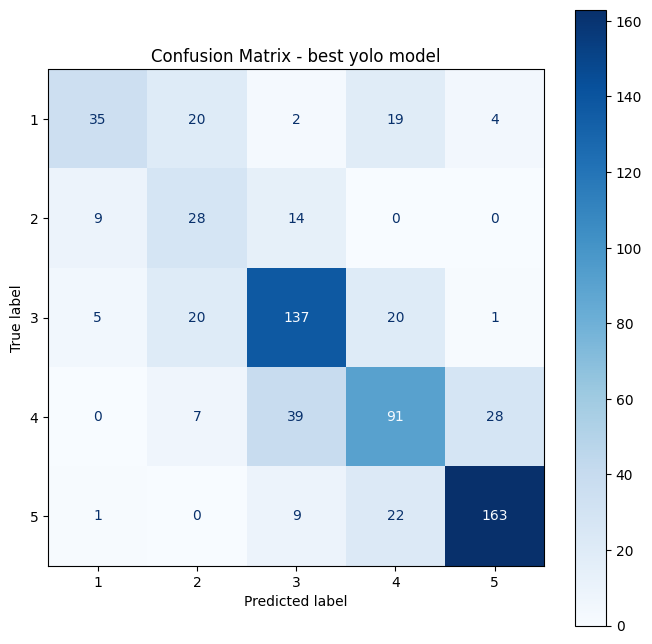

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

labels = np.array(labels)
preds = np.array(preds)

cm = confusion_matrix(labels, preds, labels=[1,2,3,4,5])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,2,3,4,5])

fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - best yolo model")
plt.savefig("best_confusion_matrix.png", bbox_inches='tight')
plt.show()

In [28]:
from rich.console import Console
from rich.table import Table

console = Console()

table = Table(title="Model Classification Report (Yolo26n-cls)")

table.add_column("Pfirrmann", justify="center", style="cyan", no_wrap=True)
table.add_column("Precision", justify="center", style="white")
table.add_column("Recall", justify="center", style="white")
table.add_column("F1-Score", justify="center", style="white")
table.add_column("Support", justify="center", style="white")

table.add_row("1", "0.7000", "0.4375", "0.5385", "80")
table.add_row("2", "0.3733", "0.5490", "0.4444", "51")
table.add_row("3", "0.6816", "0.7486", "0.7135", "183")
table.add_row("4", "0.5987", "0.5515", "0.5741", "165")
table.add_row("5", "0.8316", "0.8359", "0.8338", "195")

console.print(table)

       Model Classification Report (Yolo26n-cls)       
┏━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃ Pfirrmann ┃ Precision ┃ Recall ┃ F1-Score ┃ Support ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│     1     │  0.7000   │ 0.4375 │  0.5385  │   80    │
│     2     │  0.3733   │ 0.5490 │  0.4444  │   51    │
│     3     │  0.6816   │ 0.7486 │  0.7135  │   183   │
│     4     │  0.5987   │ 0.5515 │  0.5741  │   165   │
│     5     │  0.8316   │ 0.8359 │  0.8338  │   195   │
└───────────┴───────────┴────────┴──────────┴─────────┘